## Data Cleaning and Analysis Notebook 📊 🧹- Md Jahid Hassan

### Overview of the Dataset 📝

Welcome to my data cleaning and analysis notebook! 🌟 Let's take a quick look on the Dataset 

- **Dataset**: Selling information for 4 courses
- **Columns**
    - **Name** 
    - **Email**
    - **Course**
    - **Registration Date**
    - **Paid Amount**
### Tools Used 🛠️

In this task , I employed various tools to explore and visualize the data effectively. The primary tools utilized include:

- **Python**
- **NumPy**
- **Pandas**
- **Matplotlib**
- **Seaborn**
  
### Purpose and Quest ⚔️

My purpose was to transform this  dataset into meaningful insights after driving some preprossing step.Here's the treasure map I followed: 

1. **Data Extraction**:
    - I extracted meaningful  information from a garbage  CSV file.
</br>
</br>    
2. **Data Cleaning**:
    - **Missing Values** : I filled some nan values with cumstom values and rest of nan values was removed. 
    - **Outliers** : I spotted the odd ones out and gently nudged them away.
    - **Duplicates** : No room for twins! I removed duplicate records.
    - **Date Strings** : transformed  unstuctured dates into usable dates.
    - **Strings and Emails** : I split unnecessary  strings and email columns, making them easier to read.
</br>
</br>
3. **I used Exploratory Data Analysis (EDA) to answer these questions by gaining insights from the data.**:
   
    - How much revenue has been generated from courses selling .💰
    - How many students have enrolled in each course? 🎓
    - What is the total earnings from each course?💎
    - On which day of the week has the highest selling ?
    - On which day of the week is a specific course sold the most?
    - Whether how many students have fully or due in specific courses ?
    - Which day of the week has the highest enrollment for fully paid courses ?
    - Which day of the week has the highest due sells ⏳

-------------------------------------------------------------------------------------------------------



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Set Primary Glance

In [220]:
df=pd.read_csv("course_selling_info.csv")
df.head(3)

,Unnamed: 0,Unnamed: 1,One Skill to Rule Them All,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,NaN,NaN,Name,Email,Course,Registration Date,Fee Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Extracting  meaningful data values

In [222]:
ndf=df.iloc[3:,2:7]

In [223]:
ndf.head(1)

,One Skill to Rule Them All,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
3,Hailey Antcliff,Hailey_Antcliff9757@yahoo.audio,Leadership,"Wednesday, December 14, 2022",500


### rename the  Columns

In [224]:
columns=["Name","Email","Course","Registration_date","Paid_ammount"]
ndf.columns=columns
ndf.head(1)

,Name,Email,Course,Registration_date,Paid_ammount
3,Hailey Antcliff,Hailey_Antcliff9757@yahoo.audio,Leadership,"Wednesday, December 14, 2022",500


### Summary about the filtered datasets

In [67]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 3 to 132
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               130 non-null    object
 1   Email              130 non-null    object
 2   Course             105 non-null    object
 3   Registration_date  111 non-null    object
 4   Paid_ammount       94 non-null     object
dtypes: object(5)
memory usage: 5.2+ KB


### Checking whether is there any nan values in columns 

In [68]:
ndf.isnull().values.any()

True

In [69]:
# total number nan values in each  column .
missing_values=ndf.isna().sum()  # df.isnull().sum() "samiliar thing "
missing_values

Name                  0
Email                 0
Course               25
Registration_date    19
Paid_ammount         36
dtype: int64

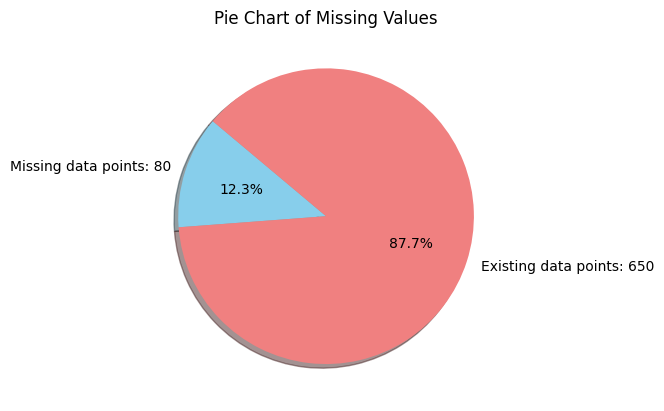

In [225]:
#percentage of missing values

total_datapoints= np.product(ndf.shape)
total_missing_points=missing_values.sum()
percent_missing = (total_missing_points/ total_datapoints) * 100

pie_data = [percent_missing, 100 - percent_missing]
pie_labels = ['Missing data points: {}'.format(total_missing_points), 'Existing data points: {}'.format(total_datapoints)]

colors = ['skyblue', 'lightcoral']
plt.pie(pie_data,labels=pie_labels,colors=colors,shadow=True,startangle=140, autopct="%1.1f%%")
plt.title('Pie Chart of Missing Values')
plt.show()

In [226]:
#displaying missing values
ndf[ndf.isnull().values]

,Name,Email,Course,Registration_date,Paid_ammount
7,Maya Randall,Maya_Randall2939@lhp4j.meet,NaN,NaN,100
7,Maya Randall,Maya_Randall2939@lhp4j.meet,NaN,NaN,100
9,Freya Reynolds,Freya_Reynolds9608@bqkv0.site,Accounting,"Saturday, December 3, 2022",NaN
12,Kieth Lynn,Kieth_Lynn9930@voylg.online,Analytics,"Friday, December 2, 2022",NaN
16,Hayden Gordon,Hayden_Gordon9449@gnjps.directory,Analytics,"Sunday, December 4, 2022",NaN
...,...,...,...,...,...
119,Emely Wilkinson,Emely_Wilkinson7293@cdpfn.property,NaN,NaN,250
126,Maya Randall,Maya_Randall2939@lhp4j.meet,NaN,NaN,100
126,Maya Randall,Maya_Randall2939@lhp4j.meet,NaN,NaN,100
128,Freya Reynolds,Freya_Reynolds9608@bqkv0.site,Accounting,"Saturday, December 3, 2022",NaN


<!DOCTYPE html>
<html>
<head>
    <style>
        /* Add your custom styling here */
        .method {
            font-weight: bold;
        }
        .code {
            font-family: monospace;
            background-color: #f7f7f7;
            padding: 5px;
        }
    </style>
</head>
<body>
    <h2>Missing Value Handling</h2>
    <p>There are several methods to handle NaN (Not-a-Number) values:</p>
    <ol>
        <li class="method">
            <strong>Mean/Median or Custom Value Imputation (for numeric values)</strong>
            <p>Replace missing numerical values with the mean or median of the feature:</p>
            <pre class="code">ndf['column_name'].fillna(ndf['column_name'].mean(), inplace=True)</pre>
        </li>
        <li class="method">
            <strong>Mode Imputation (for categorical data)</strong>
            <p>Replace missing values with the most frequent category (mode):</p>
            <pre class="code">ndf['category_column'].fillna(ndf['category_column'].mode()[0], inplace=True)</pre>
        </li>
        <li class="method">
            <strong>Dropping Rows or Columns</strong>
            <p>If the dataset is large enough, consider dropping missing values from any specific columns:</p>
            <pre class="code">ndf.dropna(subset=['column_name'], inplace=True)</pre>
        </li>
        <li class="method">
            <strong>K-Nearest Neighbors (KNN) Imputation</strong>
            <p>Impute missing values based on the values of their nearest neighbors:</p>
            <pre class="code">
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
ndf_imputed = pd.DataFrame(imputer.fit_transform(ndf), columns=ndf.columns)
            </pre>
        </li>
        <li class="method">
            <strong>Regression Imputation</strong>
            <p>Impute missing values based on regression models using other features:</p>
            <pre class="code">
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
# Assuming 'feature1' and 'feature2' are other relevant features
ndf['column_name'] = regressor.fit(ndf[['feature1', 'feature2']], ndf['column_name']).predict(ndf[['feature1', 'feature2']])
            </pre>
        </li>
    </ol>
    <!-- Add any additional content or explanations here -->
</body>
</html>


In [74]:
#Custom value imputation
ndf.Paid_ammount.fillna(0,inplace=True)

In [75]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 3 to 132
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               130 non-null    object
 1   Email              130 non-null    object
 2   Course             105 non-null    object
 3   Registration_date  111 non-null    object
 4   Paid_ammount       130 non-null    object
dtypes: object(5)
memory usage: 5.2+ KB


In [76]:
ndf[ndf.isnull().values]

,Name,Email,Course,Registration_date,Paid_ammount
7,Maya Randall,Maya_Randall2939@lhp4j.meet,NaN,NaN,100
7,Maya Randall,Maya_Randall2939@lhp4j.meet,NaN,NaN,100
17,Marilyn Lomax,Marilyn_Lomax5283@c2nyu.online,NaN,NaN,500
17,Marilyn Lomax,Marilyn_Lomax5283@c2nyu.online,NaN,NaN,500
19,Alice Spencer,Alice_Spencer8470@yafr7.services,NaN,NaN,250
19,Alice Spencer,Alice_Spencer8470@yafr7.services,NaN,NaN,250
21,Erick Whitmore,Erick_Whitmore5039@crzq7.center,NaN,NaN,500
21,Erick Whitmore,Erick_Whitmore5039@crzq7.center,NaN,NaN,500
24,Ada Brennan,Ada_Brennan2264@ag5wi.info,NaN,NaN,0
24,Ada Brennan,Ada_Brennan2264@ag5wi.info,NaN,NaN,0


In [77]:
# Dropping rows containing NaN values, specifically in the 'Course' column
ndf.dropna(subset=['Course'], inplace=True)

In [78]:
ndf[ndf.isnull().values]

,Name,Email,Course,Registration_date,Paid_ammount


In [79]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 3 to 132
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               105 non-null    object
 1   Email              105 non-null    object
 2   Course             105 non-null    object
 3   Registration_date  105 non-null    object
 4   Paid_ammount       105 non-null    object
dtypes: object(5)
memory usage: 4.9+ KB


### Check whether any duplicates  rows 

In [80]:
ndf.duplicated().sum() 

0

In [81]:
nd=ndf.Email.duplicated().sum()
str="The are {} duplicate  Emails"
print(str.format(nd))

The are 12 duplicate  Emails


In [82]:
ndf.duplicated(["Email","Course"]).sum()

12

#### Showing all duplicated values

In [83]:
ndf[ndf.duplicated(["Email","Course"], keep=False)]  # shows all duplicated values 

,Name,Email,Course,Registration_date,Paid_ammount
3,Hailey Antcliff,Hailey_Antcliff9757@yahoo.audio,Leadership,"Wednesday, December 14, 2022",500
4,Harvey Reyes,Harvey_Reyes9354@voylg.directory,Analytics,"Friday, December 30, 2022",500
5,Carina Stubbs,Carina_Stubbs8509@jh02o.org,Accounting,"Sunday, December 4, 2022",500
6,Ramon Redden,Ramon_Redden905@1kmd3.club,Design and technology,"Wednesday, December 7, 2022",500
8,Matt Ashley,Matt_Ashley6946@jh02o.info,Analytics,"Friday, December 30, 2022",100
11,Jack Hobbs,Jack_Hobbs4073@evyvh.auction,Design and technology,"Wednesday, December 7, 2022",500
15,Henry Edmonds,Henry_Edmonds4807@dbxli.store,Analytics,"Wednesday, December 21, 2022",500
25,Barney Morris,Barney_Morris5647@hepmv.autos,Analytics,"Saturday, December 24, 2022",500
29,Caydence Fisher,Caydence_Fisher2480@bcfhs.store,Leadership,"Wednesday, December 28, 2022",500
34,Nicole Norton,Nicole_Norton7231@avn7d.zone,Analytics,"Friday, December 23, 2022",250


In [84]:
# ndf.drop_duplicates(["Email","Course")], keep="first",inplace=True) # keeping the starting   duplicates values and remove others duplicated values
ndf.drop_duplicates(["Email", "Course"], keep="first",inplace=True)

In [85]:
ndf[ndf.duplicated(["Email","Course"], keep=False)]

,Name,Email,Course,Registration_date,Paid_ammount


### Outlook of datasets after some preprossed step

In [86]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 3 to 132
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               93 non-null     object
 1   Email              93 non-null     object
 2   Course             93 non-null     object
 3   Registration_date  93 non-null     object
 4   Paid_ammount       93 non-null     object
dtypes: object(5)
memory usage: 4.4+ KB


In [87]:
ndf.head(2)

,Name,Email,Course,Registration_date,Paid_ammount
3,Hailey Antcliff,Hailey_Antcliff9757@yahoo.audio,Leadership,"Wednesday, December 14, 2022",500
4,Harvey Reyes,Harvey_Reyes9354@voylg.directory,Analytics,"Friday, December 30, 2022",500


## User defined function for custom preprossing

### Date columns formation in the new Format . Wednesday, December 7, 2022	 to Day/Month/Year 

In [116]:
# def date_formation(x):
#     try:
#         day=((x.split(",")[1]).split(" "))[2]
#         date=day+"/12/2022"
#     except AttributeError:   
#         date=x
#     return date


# date_format=ndf.Registration_date.map(date_formation)
# date_format   # date new format

#### spliting only days  name

In [117]:
def day_split(x):
    try:
        day=x.split(",")[0]
    except AttributeError:   
        day=x
    return day


#### Name new formation . keep only first term

In [109]:
def name_formation(name):
    s_n=name.split(" ")          # defined a function for formation name . 
    return s_n[0]+s_n[1][0]  
    

#### making dataset easier to understand 

In [120]:
ndf.Day=ndf.Registration_date.map(day_split) # keeping only day 
ndf.Registration_date=pd.to_datetime(ndf.Registration_date) # parsing dates 
ndf.Name=ndf.Name.map(name_formation) # keeping only first name
fresh_df=ndf.drop(columns=['Email'])  # removing the emails colums 

In [129]:
fresh_df.head(1)

,Name,Course,Registration_date,Paid_ammount,Day
0,HaileyA,Leadership,2022-12-14,500,Wednesday


In [150]:
fresh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Name               93 non-null     object        
 1   Course             93 non-null     object        
 2   Registration_date  93 non-null     datetime64[ns]
 3   Paid_ammount       93 non-null     object        
 4   Day                93 non-null     object        
dtypes: datetime64[ns](1), object(4)
memory usage: 3.8+ KB


In [151]:
fresh_df['Paid_ammount'] = fresh_df['Paid_ammount'].astype(int)

In [152]:
fresh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Name               93 non-null     object        
 1   Course             93 non-null     object        
 2   Registration_date  93 non-null     datetime64[ns]
 3   Paid_ammount       93 non-null     int32         
 4   Day                93 non-null     object        
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 3.4+ KB


<!DOCTYPE html>
<html>
<head>
    <title> </title>
</head>
<body>
    <h1 align="center">Making insight from data</h1>
    <ol>
        <li>How much revenue has been generated from courses selling .</li>
        <li>How many students have enrolled in each course?</li>
        <li>What is the total earnings from each course?</li>
        <li>On which day of the week has the highest selling ?</li>
        <li>On which day of the week is a specific course sold the most?</li>
        <li> Whether how many students  have fully or due in specific courses ?</li>
        <li> Which day of the week has the highest enrollment for fully paid courses ?</li>
        <li> Which day of the week has the highest due sells </li>
    </ol>
</body>
</html>


#### 1. How much revenue has been generated from courses selling .  

In [154]:
fresh_df.Paid_ammount.sum() # agg(["min","max","sum"])

21400

#### 2. How many students have enrolled in each course?

In [155]:
fresh_df.Course.value_counts()

Course
Analytics                33
Leadership               25
Design and technology    20
Accounting               15
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Course'>

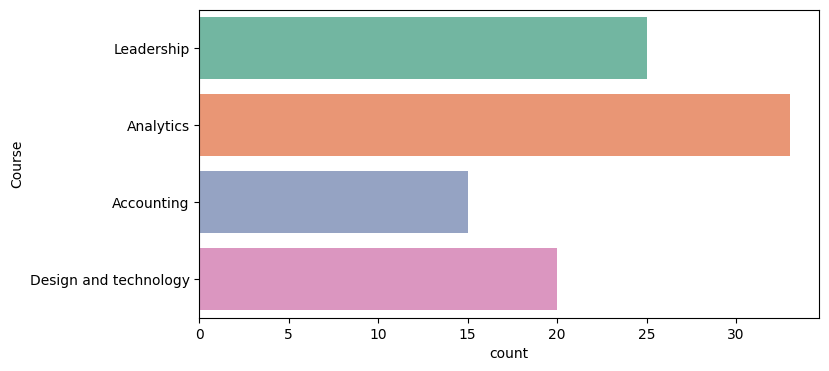

In [219]:
plt.figure(figsize=(8,4))
sns.countplot(y="Course", data=fresh_df, hue="Course", palette="Set2", legend=False)

#### 3. What is the total earnings from each course?

In [180]:
fresh_df.groupby("Course").Paid_ammount.sum().sort_values(ascending=False)

Course
Analytics                9900
Design and technology    4900
Leadership               4400
Accounting               2200
Name: Paid_ammount, dtype: int32

<Axes: xlabel='Course'>

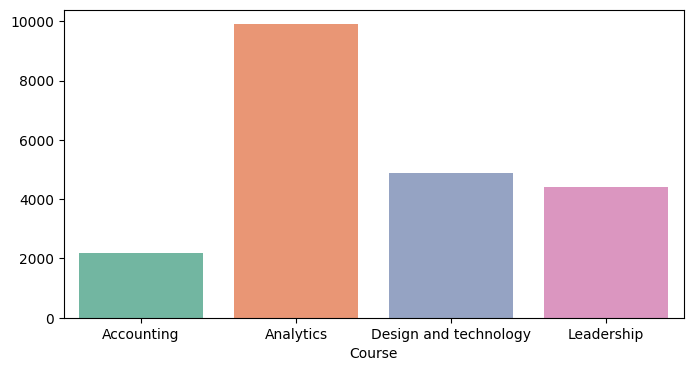

In [188]:
plt.figure(figsize=(8,4))
tk_df=fresh_df.groupby("Course").Paid_ammount.sum()
sns.barplot(x=tk_df.index, y=tk_df.values, hue=tk_df.index, palette="Set2")

#### 4. On which day of the week has the highest selling ?

In [190]:
fresh_df.groupby("Day").Paid_ammount.sum().sort_values(ascending=False)

Day
Wednesday    4850
Friday       3200
Thursday     3200
Saturday     2800
Monday       2750
Sunday       2300
Tuesday      2300
Name: Paid_ammount, dtype: int32

#### 5. On which day of the week is a specific course sold the most?

In [196]:
fresh_df.groupby("Day").Course.value_counts()
for x,y in fresh_df.groupby("Day"):
    print(x)
    print("Total enrollment:",len(y))
    print(".................")
    print(y.Course.value_counts())
    print("\n")

Friday
Total enrollment: 16
.................
Course
Analytics                10
Accounting                3
Leadership                2
Design and technology     1
Name: count, dtype: int64


Monday
Total enrollment: 13
.................
Course
Leadership               5
Analytics                4
Accounting               3
Design and technology    1
Name: count, dtype: int64


Saturday
Total enrollment: 13
.................
Course
Analytics                5
Leadership               5
Accounting               2
Design and technology    1
Name: count, dtype: int64


Sunday
Total enrollment: 12
.................
Course
Analytics                5
Leadership               3
Accounting               2
Design and technology    2
Name: count, dtype: int64


Thursday
Total enrollment: 16
.................
Course
Design and technology    6
Analytics                4
Leadership               4
Accounting               2
Name: count, dtype: int64


Tuesday
Total enrollment: 10
.................


<Axes: xlabel='Day', ylabel='count'>

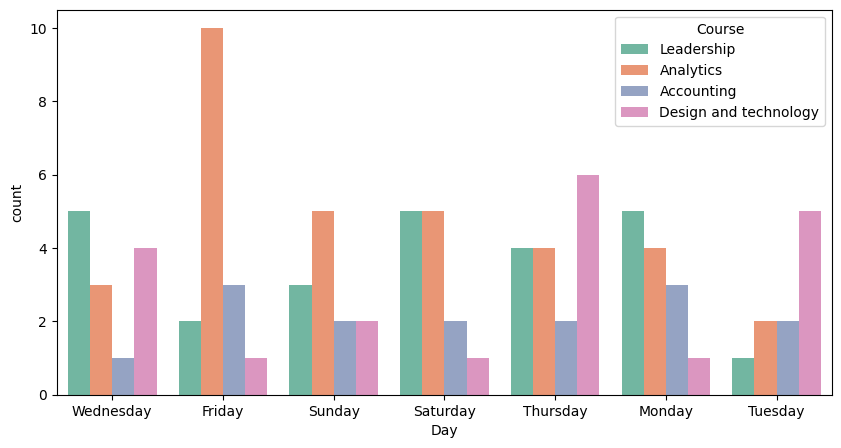

In [197]:
plt.figure(figsize=(10,5))
sns.countplot(x="Day",hue="Course",data=fresh_df,palette="Set2")

#### 6. Whether how many students  have fully or due in specific courses ?

In [206]:
due_df=fresh_df[fresh_df.Paid_ammount==0]
paid_df=fresh_df[fresh_df.Paid_ammount!=0]

print("Total number of due:", len(due_df))
print(due_df.Course.value_counts())

print("\nTotal number of fully paid:", len(paid_df))
print(paid_df.Course.value_counts())


Total number of due: 28
Course
Leadership               10
Accounting                8
Analytics                 6
Design and technology     4
Name: count, dtype: int64

Total number of fully paid: 65
Course
Analytics                27
Design and technology    16
Leadership               15
Accounting                7
Name: count, dtype: int64


#### 7. Which day of the week has the highest enrollment for fully paid courses ?

In [213]:
paid_df.Day.value_counts()

Day
Wednesday    12
Thursday     11
Friday       10
Saturday      9
Monday        8
Tuesday       8
Sunday        7
Name: count, dtype: int64

<Axes: xlabel='Day', ylabel='count'>

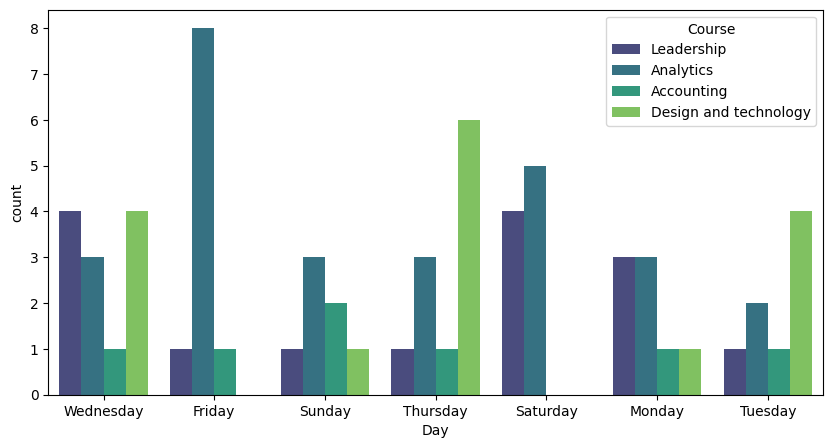

In [216]:
plt.figure(figsize=(10,5))
sns.countplot(x="Day",hue="Course",data=paid_df,palette="viridis")

#### 8. Which day of the week has the highest due sells 

In [217]:
due_df.Day.value_counts()

Day
Friday       6
Sunday       5
Thursday     5
Monday       5
Saturday     4
Tuesday      2
Wednesday    1
Name: count, dtype: int64

<Axes: xlabel='Day', ylabel='count'>

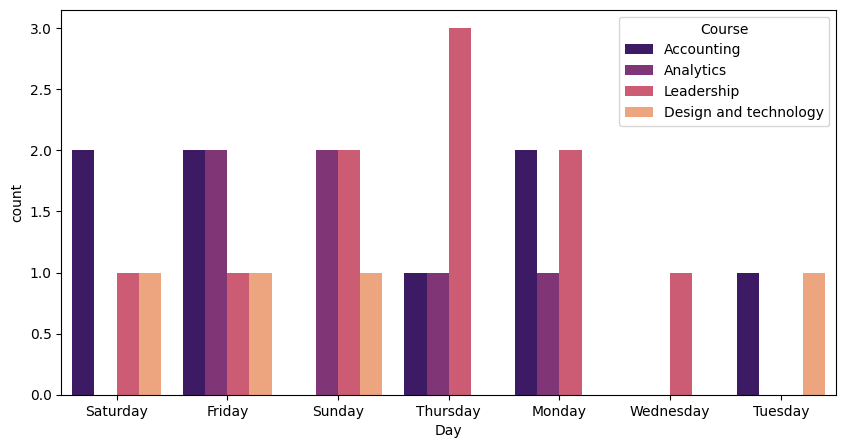

In [218]:
plt.figure(figsize=(10,5))
sns.countplot(x="Day",hue="Course",data=due_df,palette="magma")